In [1]:
from matplotlib import pyplot as plt 
import numpy as np 

# ПРИБЛИЖЕНИЕ ФУНКЦИЙ
# Вариант 24 

In [2]:
x = np.linspace(5.5, 8.5,13) # у нас 13 точек 
y=np.array([1.542, 0.652, -0.008, -0.62, -0.751, -1.183, -1.229, -1.139, -0.77, -0.586, -0.066,  0.633, 1.542])
print("Вектор Х")
print(x)
print("Вектор У")
print(y)

Вектор Х
[5.5  5.75 6.   6.25 6.5  6.75 7.   7.25 7.5  7.75 8.   8.25 8.5 ]
Вектор У
[ 1.542  0.652 -0.008 -0.62  -0.751 -1.183 -1.229 -1.139 -0.77  -0.586
 -0.066  0.633  1.542]


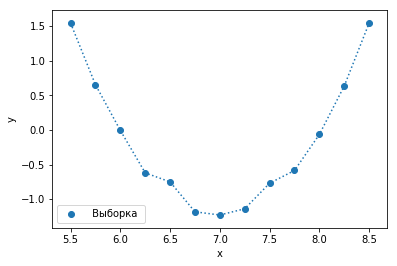

In [3]:
plt.plot(x, y, ":")
plt.scatter(x, y,  label = " Выборка ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Метод наименьших квадратов. 
Метод  основан на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. Наша задача состоит в том, чтобы, перебирая значения многочлена P, получить полином наилучшего среднеквадратичного приближения. Оптимальной степенью многочлена считается степень, начиная с которой значения отклонения стабилизируется или начинает возрастать. 

Пусть даны значения Х (аргументы) и У (значения функции) размера n+1. Тогда для многочлена степени m минимизируемая величина определяется следующим образом:
$$ \sigma_m = \sqrt{\frac{1}{n-m} \sum_{k=0}^{n} (P_m(x_k) - y_k)^2 }$$

Этих знаний достаточно, чтобы выполнить задачу.

In [4]:
def mnk(x, y, m):
    #метод наименьших квадратов 
    b = np.zeros(m+1)
    G = np.zeros((m+1, m+1))
    for j in range(m+1):
        for i in range(len(x)):
            b[j]=b[j]+x[i]**j*y[i] #вектор правой части 
        
        for k in range(m+1):
            for i in range(len(x)):
                G[j][k]=G[j][k]+x[i]**(k+j) # матрица нормальной системы
        
    
    return np.linalg.solve(G, b) # получение коэффициентов многочлена 


def polinom_n(x, params ,m):
    #полином степени m
    result = 0.0
    for i in range(m+1):
        result = result+params[i]*x**i
        
    return result

def mean_sq(x, y, m, params):
    #считаем среднее отклонение 
    result = 0.0
    for i in range(len(x)):
        result = result +( polinom_n(x[i], params,m) - y[i]) **2 #суммируем
        
    result=result/(len(x)-m) # среднее
    return result**0.5

In [5]:
devs = [] #среднеквадратичные отклонения 
plot_i = [] 
a_all= [] #копим на будущее
for i in range(0,13): # смотрим полиномы до 12 степени 
    a = mnk(x, y, i)
    dev = mean_sq(x,y,i,a)
    a_all.append(a)
    plot_i.append(i)
    devs.append(dev)
    


Text(0.5, 1.0, 'Зависимость  отклонения от степени полинома')

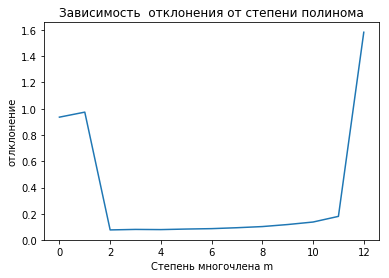

In [6]:

plt.plot(plot_i, devs)
plt.xlabel("Степень многочлена m")
plt.ylabel("отлклонение")
plt.title("Зависимость  отклонения от степени полинома")


Text(0.5, 1.0, 'Зависимость  отклонения от степени полинома')

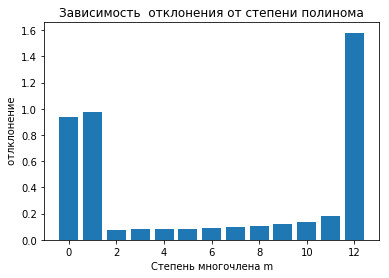

In [7]:
plt.bar(plot_i,devs)

plt.xlabel("Степень многочлена m")
plt.ylabel(" отлклонение")
plt.title("Зависимость  отклонения от степени полинома")

По графикам видно, что степень m=2 - оптимальная величина степень многочлена. После величина отклонения чуть увеличивается. 

In [8]:
print("Величина отклонений: ")
print(devs) # третий элемент самый маленький. 

Величина отклонений: 
[0.935422785152387, 0.9736076258256887, 0.07751335045450451, 0.08129551687477088, 0.0799409434459116, 0.08408325802217755, 0.08721708974184872, 0.09420623925124061, 0.10297048096959305, 0.11845432965003612, 0.13753770975936652, 0.18052376588295885, 1.5814058312165677]


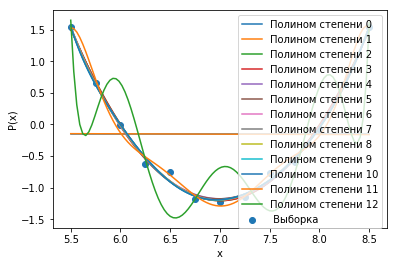

In [9]:
x_plot = np.linspace(5.5, 8.5,100)

line = np.zeros(100)
for i in range(13):
    for j in range(100):
        line[j]=polinom_n(x_plot[j], a_all[i], i)
    
    to_label = "Полином степени " + str(i) 
    plt.plot(x_plot, line, "-",label = to_label)
plt.scatter(x, y,  label = " Выборка ")

plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()

Так себе визуализация. Посмотрим еще. 

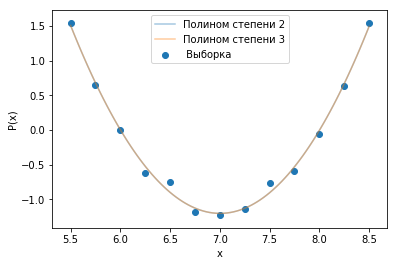

In [10]:


x_plot = np.linspace(5.5, 8.5,100)

line = np.zeros(100)
for i in range(2,4):
    for j in range(100):
        line[j]=polinom_n(x_plot[j], a_all[i], i)
    
    to_label = "Полином степени " + str(i) 
    plt.plot(x_plot, line, "-",label = to_label, alpha=0.4)
plt.scatter(x, y,  label = " Выборка ")   
plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()

Обе степеньи для полинома неплохо приближают нашу функцию, но по вычислениям было видно, что вторая степень лучше.

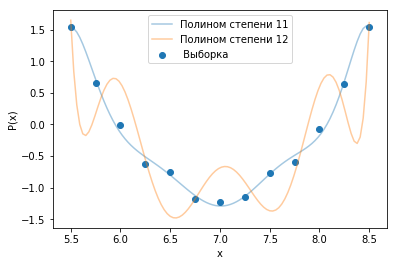

In [11]:


x_plot = np.linspace(5.5, 8.5,100)

line = np.zeros(100)
for i in range(11, 13):
    for j in range(100):
        line[j]=polinom_n(x_plot[j], a_all[i], i)
    
    to_label = "Полином степени " + str(i) 
    plt.plot(x_plot, line, "-",label = to_label, alpha=0.4)
plt.scatter(x, y,  label = " Выборка ")   
plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()

Многочлен степени 11 все еще не так плохо приближает. для полинома степени 12 видно уклонения от искомой функции. 

### Задание 2. 
$$ x(t) = vt + b $$

Будет использоваться линейная функция для поиска постоянной скорости v и предсказания движения. 

In [25]:
t = np.array([0,0.6,1.2,1.8,2.4,3,4.2,4.8,5.4,6])
x_t = [6.449,19.97,33.91,48.2,64.15,76.9,106.2,122.2,135.6,149]

In [26]:
params = mnk(t, x_t, 1) #нужное линейное 

In [27]:
print(" Найденные параметры: ")
print(params)

 Найденные параметры: 
[ 5.69371993 24.00142179]


In [28]:
print("Скорость :" , params[0])

Скорость : 5.693719926538094


In [32]:
new_t = 2*t  # для прогноза 
predict = []
for i in new_t:
    predict.append(polinom_n(i, params, 1) )
 


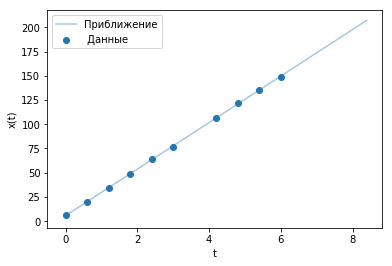

In [31]:
plt.plot(new_t[:7], predict[:7], "-",label = "Приближение", alpha=0.4)
plt.scatter(t, x_t,  label = " Данные ")   
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()

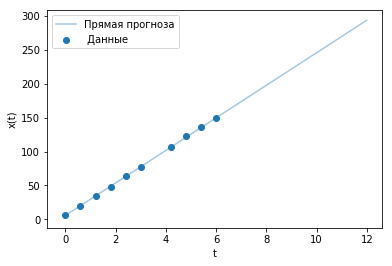

In [17]:
plt.plot(new_t, predict, "-",label = "Прямая прогноза", alpha=0.4)
plt.scatter(t, x_t,  label = " Данные ")   
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()

In [18]:
print("Координата в момент времени t=2T: ", predict[-1])

Координата в момент времени t=2T:  293.7107814508724


Предсказание смотрится адекватно, так как движение равномерное и его нетрудно описать линейно.

### Задача три 
$$ y =f(x,a,b) = \sqrt{a+bx^2}$$
Введем следующее:
$$ s = y^2 $$
$$ t = x^2 $$
Тогда 
$$ s = a+bt $$

Задача сведена к линейной задаче. Будем применять метод наименьших квадратов для поиска параметров a и b. 

In [19]:
x = np.array([-2, -1.6,   -1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2])
y = np.array([1.649, 1.942,2.142,2.274,2.35,2.375,2.35,2.274,2.142,1.942,1.649])

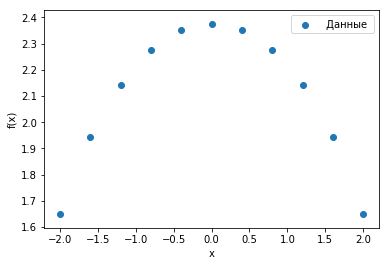

In [20]:
plt.scatter(x, y,  label = " Данные ")   
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [21]:
t = np.square(x) # это новый аргумент
s = np.square(y) # новые значения функции 

ab = mnk(t,s,1)
print("Найденные параметры: ", ab)

Найденные параметры:  [ 5.63931148 -0.72995405]


In [22]:
x_new = np.linspace(-2.0, 2, 100)

y_new = np.sqrt(ab[0]+ab[1]*np.square(x_new)) # проверить функцию



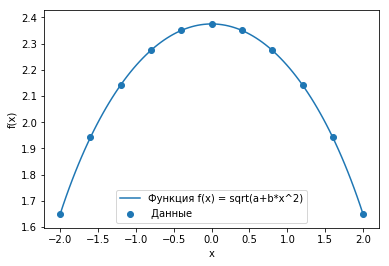

In [23]:
plt.scatter(x, y,  label = " Данные ") 
plt.plot(x_new, y_new, label = "Функция f(x) = sqrt(a+b*x^2)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

По графику видно, что найденные параметры корректны. 
Таким образом, иногда можно свести задачу к линейной для решения методом наименьшего квадрата и получить очень годный результат.